In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/glass - Sheet1.csv")
df

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
df

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.isnull().sum()

,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [4]:
print(df.head())


      Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [5]:
print(df.columns)

Index(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [6]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

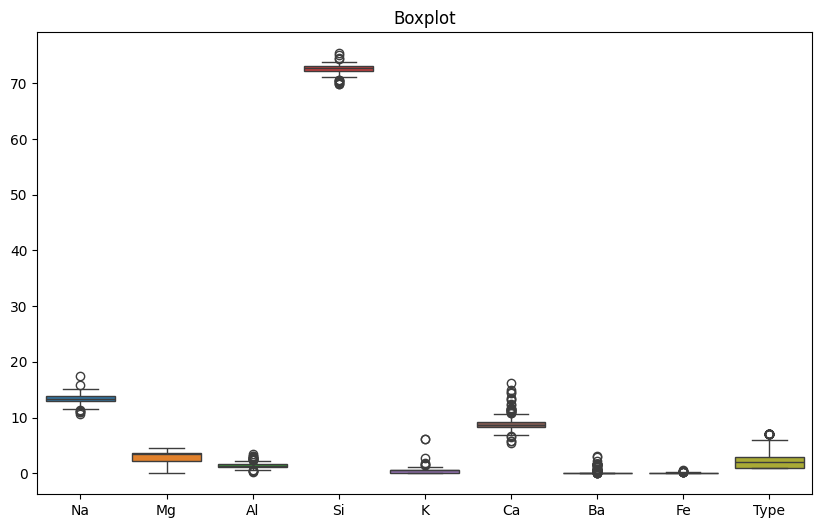

In [7]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()

<Figure size 1000x600 with 0 Axes>

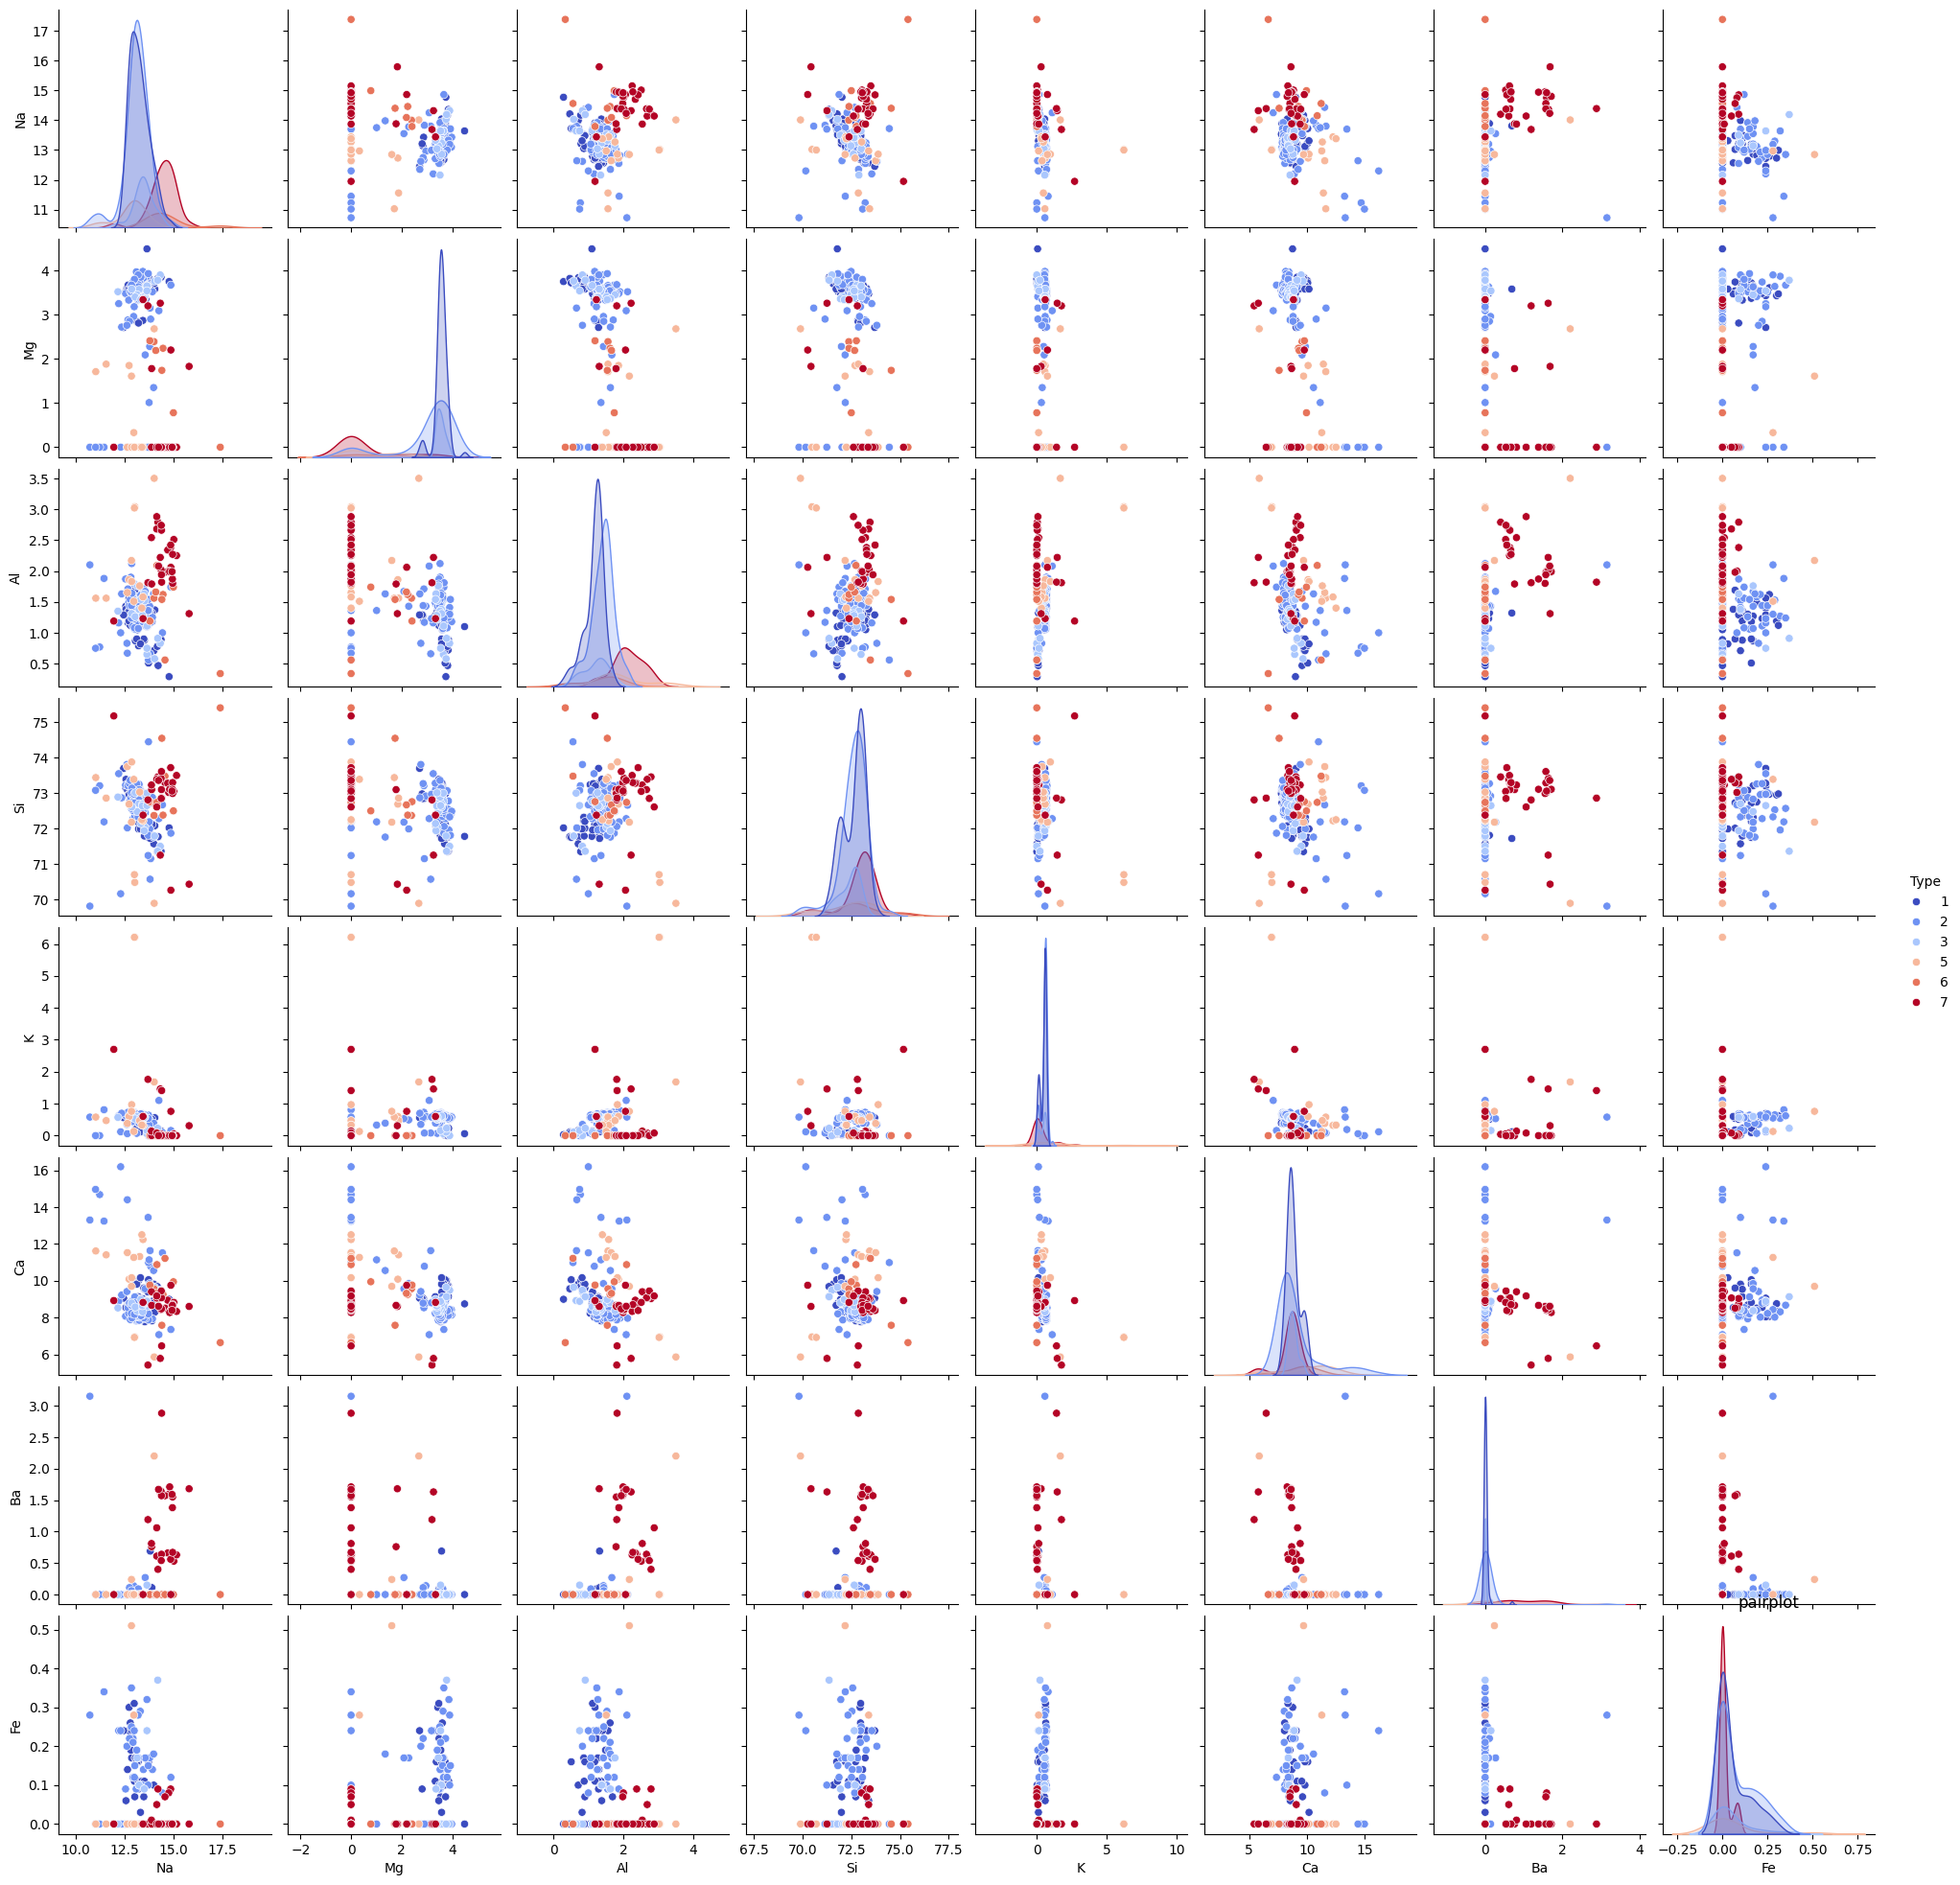

In [8]:
plt.figure(figsize=(10,6))

sns.pairplot(data=df,hue='Type',palette='coolwarm')
plt.title('pairplot')
plt.show()

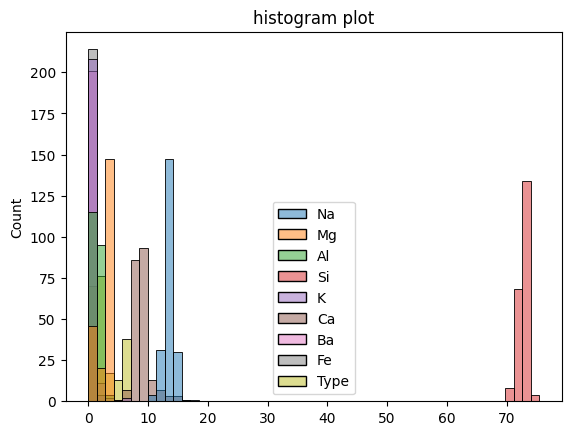

In [9]:
sns.histplot(data=df)
plt.title('histogram plot')
plt.show()

In [10]:
coor_glass=df.corr()
coor_glass


,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Na,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


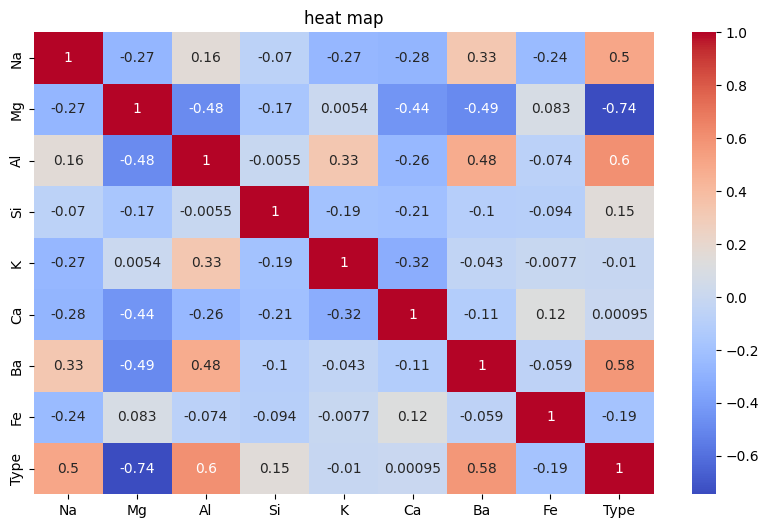

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(coor_glass,annot=True,cmap='coolwarm')
plt.title('heat map')
plt.show()

In [12]:
x=df.iloc[::,:-1]
x

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [13]:
y=df.iloc[:,-1:]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:

# 4. Build the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [16]:
y_pred=model.predict(x_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 5, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 3])

In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.83      0.78      0.79        43
weighted avg       0.83      0.81      0.81        43



In [18]:
print(confusion_matrix(y_test,y_pred))

[[10  0  1  0  0  0]
 [ 3 10  0  0  0  1]
 [ 2  0  1  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [19]:
# 1. Bagging using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
print(rf_accuracy)


0.813953488372093


In [21]:
print(rf_classification_report)

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.83      0.78      0.79        43
weighted avg       0.83      0.81      0.81        43



In [22]:
# 2. Boosting using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print(gb_accuracy)

0.7674418604651163


In [24]:
print(gb_classification_report)

              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.83      0.71      0.77        14
           3       0.67      0.67      0.67         3
           5       0.75      0.75      0.75         4
           6       1.00      0.33      0.50         3
           7       0.80      1.00      0.89         8

    accuracy                           0.77        43
   macro avg       0.79      0.71      0.72        43
weighted avg       0.78      0.77      0.76        43



#Explain Bagging and Boosting methods. How is it different from each other.
Bagging:
Bagging is an ensemble learning technique where multiple models (typically of the same type, e.g., decision trees) are trained independently on different random subsets of the training data, and their predictions are aggregated to form the final prediction. The main idea behind bagging is to reduce the variance of a model by averaging the predictions from different models.

Bosting:
Boosting is another ensemble technique, but unlike bagging, it builds models sequentially. Each model is trained to correct the errors made by the previous models. Boosting focuses more on difficult cases, so later models in the sequence are influenced by the performance of earlier models.



#Explain how to handle imbalance in the data.
Handling imbalanced data is a common challenge in machine learning, especially in classification tasks where one class significantly outweighs others (e.g., fraud detection, medical diagnoses). When data is imbalanced, models tend to predict the majority class more often, leading to poor performance for the minority class.